In [1]:
%run notebook_setup.ipynb

In [4]:
from src.utils import get_gene_embeddings

# gene_embedding = get_gene_embeddings("text-embedding-ada-002")
gene_embedding = get_gene_embeddings("text-embedding-3-large")

In [5]:
from src.utils import download_file, extract_gz
import pandas as pd

gene_sums_gz = download_file(
    "https://duffel.rail.bio/recount3/human/data_sources/gtex/gene_sums/IN/BRAIN/gtex.gene_sums.BRAIN.G026.gz"
)
gene_sums_path = extract_gz(gene_sums_gz)
gene_sums_df = pd.read_csv(str(gene_sums_path), sep="\t", comment="#")
gene_sums_df["gene_id_short"] = gene_sums_df.gene_id.str.split(".").str[0]
gene_sums_df.head()

File already exists at /Users/rj/personal/GenePT-fork/data/gtex.gene_sums.BRAIN.G026.gz
Skipping gtex.gene_sums.BRAIN.G026.gz - already exists with same size


,gene_id,GTEX-XOTO-0011-R8A-SM-4B65J.1,GTEX-117XS-3026-SM-5N9CA.1,GTEX-145MH-0011-R6a-SM-5PNZ7.1,GTEX-144GL-2926-SM-5O99F.1,GTEX-1445S-0011-R4a-SM-5PNWN.1,GTEX-RVPV-0011-R3A-SM-2TF63.1,GTEX-11H98-0011-R10b-SM-5NQ98.1,GTEX-11ZUS-2926-SM-5FQSL.1,GTEX-ZDXO-2926-SM-4WKFM.1,...,GTEX-11TTK-0011-R5a-SM-DNZZV.1,GTEX-11TTK-0011-R6b-SM-DNZZW.1,GTEX-14PN4-0011-R11a-SM-686ZW.1,GTEX-11TUW-0011-R11b-SM-DNZZX.1,GTEX-15CHQ-0011-R4a-SM-686ZX.1,GTEX-11PRG-0011-R11b-SM-DNZZY.1,GTEX-15CHQ-0011-R3b-SM-686ZY.1,GTEX-11TTK-0011-R7b-SM-DNZZZ.1,GTEX-15CHQ-0011-R11b-SM-686ZZ.1,gene_id_short
0,ENSG00000278704.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000278704
1,ENSG00000277400.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000277400
2,ENSG00000274847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000274847
3,ENSG00000277428.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000277428
4,ENSG00000276256.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000276256


In [6]:
gene_info_table = pd.read_csv("input_data/gene_info_table.csv")
gene_info_table.head()

,Unnamed: 0,ensembl_id,gene_name,gene_type
0,0,ENSG00000000003,TSPAN6,protein_coding
1,1,ENSG00000000005,TNMD,protein_coding
2,2,ENSG00000000419,DPM1,protein_coding
3,3,ENSG00000000457,SCYL3,protein_coding
4,4,ENSG00000000460,C1orf112,protein_coding


In [7]:
gene_sums_with_names = gene_sums_df.merge(
    gene_info_table, left_on="gene_id_short", right_on="ensembl_id", how="left"
)
gene_sums_with_names.head()

,gene_id,GTEX-XOTO-0011-R8A-SM-4B65J.1,GTEX-117XS-3026-SM-5N9CA.1,GTEX-145MH-0011-R6a-SM-5PNZ7.1,GTEX-144GL-2926-SM-5O99F.1,GTEX-1445S-0011-R4a-SM-5PNWN.1,GTEX-RVPV-0011-R3A-SM-2TF63.1,GTEX-11H98-0011-R10b-SM-5NQ98.1,GTEX-11ZUS-2926-SM-5FQSL.1,GTEX-ZDXO-2926-SM-4WKFM.1,...,GTEX-15CHQ-0011-R4a-SM-686ZX.1,GTEX-11PRG-0011-R11b-SM-DNZZY.1,GTEX-15CHQ-0011-R3b-SM-686ZY.1,GTEX-11TTK-0011-R7b-SM-DNZZZ.1,GTEX-15CHQ-0011-R11b-SM-686ZZ.1,gene_id_short,Unnamed: 0,ensembl_id,gene_name,gene_type
0,ENSG00000278704.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000278704,66320.0,ENSG00000278704,BX004987.1,protein_coding
1,ENSG00000277400.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000277400,65583.0,ENSG00000277400,AC145212.2,protein_coding
2,ENSG00000274847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000274847,64246.0,ENSG00000274847,MAFIP,protein_coding
3,ENSG00000277428.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000277428,65598.0,ENSG00000277428,Y_RNA,misc_RNA
4,ENSG00000276256.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000276256,64996.0,ENSG00000276256,LOC389831,protein_coding


In [8]:
gene_sums_with_names.gene_id[gene_sums_with_names.gene_name.isna()]

8        ENSG00000273735.4
9        ENSG00000273517.1
10       ENSG00000277650.1
11       ENSG00000274676.1
12       ENSG00000276534.5
               ...        
41640    ENSG00000279184.1
43934    ENSG00000283374.1
59184    ENSG00000281205.1
59393    ENSG00000274916.1
59395    ENSG00000273676.1
Name: gene_id, Length: 3365, dtype: object

In [9]:
print("Total genes in gene_sums_with_names:", len(gene_sums_with_names))
print(
    "Total distinct genes in gene_sums_with_names:",
    len(gene_sums_with_names.gene_name.unique()),
)
print(
    "Total genes with embeddings:",
    gene_sums_with_names.gene_name.apply(lambda x: x in gene_embedding).sum(),
)
print(
    "Total genes with embeddings:",
    gene_sums_with_names.gene_name.apply(lambda x: x in gene_embedding).sum(),
)

print("total embeddings:", len(gene_embedding.keys()))

Total genes in gene_sums_with_names: 63856
Total distinct genes in gene_sums_with_names: 56409
Total genes with embeddings: 32359
Total genes with embeddings: 32359
total embeddings: 133736


In [10]:
metadata_gz = download_file(
    "https://duffel.rail.bio/recount3/human/data_sources/gtex/metadata/IN/BRAIN/gtex.gtex.BRAIN.MD.gz"
)
metadata_path = extract_gz(metadata_gz)
metadata_df = pd.read_csv(str(metadata_path), sep="\t", comment="#")
metadata_df.columns

File already exists at /Users/rj/personal/GenePT-fork/data/gtex.gtex.BRAIN.MD.gz
Skipping gtex.gtex.BRAIN.MD.gz - already exists with same size


Index(['rail_id', 'run_acc', 'external_id', 'study', 'SUBJID', 'SEX', 'AGE',
       'DTHHRDY', 'SAMPID', 'SMATSSCR', 'SMCENTER', 'SMPTHNTS', 'SMRIN',
       'SMTS', 'SMTSD', 'SMUBRID', 'SMTSISCH', 'SMTSPAX', 'SMNABTCH',
       'SMNABTCHT', 'SMNABTCHD', 'SMGEBTCH', 'SMGEBTCHD', 'SMGEBTCHT',
       'SMAFRZE', 'SMGTC', 'SME2MPRT', 'SMCHMPRS', 'SMNTRART', 'SMNUMGPS',
       'SMMAPRT', 'SMEXNCRT', 'SM550NRM', 'SMGNSDTC', 'SMUNMPRT', 'SM350NRM',
       'SMRDLGTH', 'SMMNCPB', 'SME1MMRT', 'SMSFLGTH', 'SMESTLBS', 'SMMPPD',
       'SMNTERRT', 'SMRRNANM', 'SMRDTTL', 'SMVQCFL', 'SMMNCV', 'SMTRSCPT',
       'SMMPPDPR', 'SMCGLGTH', 'SMGAPPCT', 'SMUNPDRD', 'SMNTRNRT', 'SMMPUNRT',
       'SMEXPEFF', 'SMMPPDUN', 'SME2MMRT', 'SME2ANTI', 'SMALTALG', 'SME2SNSE',
       'SMMFLGTH', 'SME1ANTI', 'SMSPLTRD', 'SMBSMMRT', 'SME1SNSE', 'SME1PCTS',
       'SMRRNART', 'SME1MPRT', 'SMNUM5CD', 'SMDPMPRT', 'SME2PCTS'],
      dtype='object')

In [11]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
print(metadata_df.loc[0])

rail_id                                                  4858719
run_acc                                               SRR1444460
external_id                           GTEX-1117F-3226-SM-5N9CT.1
study                                                      BRAIN
SUBJID                                                GTEX-1117F
SEX                                                            2
AGE                                                        60-69
DTHHRDY                                                        4
SAMPID                                  GTEX-1117F-3226-SM-5N9CT
SMATSSCR                                                     1.0
SMCENTER                                                      B1
SMPTHNTS                                                2 pieces
SMRIN                                                        6.2
SMTS                                                       Brain
SMTSD                                             Brain - Cortex
SMUBRID                  

In [12]:
experiment_ids = gene_sums_with_names.columns[
    gene_sums_with_names.columns.str.contains("GTEX")
]
experiment_ids

Index(['GTEX-XOTO-0011-R8A-SM-4B65J.1', 'GTEX-117XS-3026-SM-5N9CA.1',
       'GTEX-145MH-0011-R6a-SM-5PNZ7.1', 'GTEX-144GL-2926-SM-5O99F.1',
       'GTEX-1445S-0011-R4a-SM-5PNWN.1', 'GTEX-RVPV-0011-R3A-SM-2TF63.1',
       'GTEX-11H98-0011-R10b-SM-5NQ98.1', 'GTEX-11ZUS-2926-SM-5FQSL.1',
       'GTEX-ZDXO-2926-SM-4WKFM.1', 'GTEX-12WSA-0011-R8a-SM-5P9EX.1',
       ...
       'GTEX-14PN4-0011-R5a-SM-686ZV.1', 'GTEX-11TTK-0011-R5a-SM-DNZZV.1',
       'GTEX-11TTK-0011-R6b-SM-DNZZW.1', 'GTEX-14PN4-0011-R11a-SM-686ZW.1',
       'GTEX-11TUW-0011-R11b-SM-DNZZX.1', 'GTEX-15CHQ-0011-R4a-SM-686ZX.1',
       'GTEX-11PRG-0011-R11b-SM-DNZZY.1', 'GTEX-15CHQ-0011-R3b-SM-686ZY.1',
       'GTEX-11TTK-0011-R7b-SM-DNZZZ.1', 'GTEX-15CHQ-0011-R11b-SM-686ZZ.1'],
      dtype='object', length=2931)

In [13]:
import numpy as np

gene_names = list(gene_sums_with_names.gene_name)
count_missing = 0
EMBED_DIM = len(next(iter(gene_embedding.values())))  # embedding dim from GPT-3.5
lookup_embed = np.zeros(shape=(len(gene_names), EMBED_DIM))
for i, gene in enumerate(gene_names):
    if gene in gene_embedding:
        lookup_embed[i, :] = gene_embedding[gene]
    else:
        count_missing += 1

genePT_w_emebed = np.dot(gene_sums_with_names[experiment_ids].T, lookup_embed) / len(
    gene_names
)
print(
    f"Unable to match {count_missing} out of {len(gene_names)} genes in the GenePT-w embedding"
)

Unable to match 31497 out of 63856 genes in the GenePT-w embedding


In [14]:
normalized_embeddings_df = pd.DataFrame(genePT_w_emebed, index=experiment_ids).div(
    pd.DataFrame(genePT_w_emebed, index=experiment_ids).sum(axis=1), axis=0
)
normalized_embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
GTEX-XOTO-0011-R8A-SM-4B65J.1,-0.009370,0.021788,-0.013348,0.004644,0.001597,-0.001288,0.013283,-0.019580,0.012515,0.006830,...,0.000947,0.010675,0.016128,-0.010246,-0.000877,-0.000393,0.015994,-0.004122,-0.010045,-0.003440
GTEX-117XS-3026-SM-5N9CA.1,-0.007627,0.021771,-0.012935,0.003745,0.001096,-0.001337,0.013921,-0.019292,0.011577,0.007316,...,0.001035,0.011221,0.016132,-0.010205,-0.001529,0.000083,0.015796,-0.004332,-0.009617,-0.004296
GTEX-145MH-0011-R6a-SM-5PNZ7.1,-0.008543,0.022120,-0.013211,0.004243,0.000579,-0.001527,0.014329,-0.020249,0.011858,0.007474,...,0.000788,0.011412,0.016748,-0.010457,-0.001365,0.000084,0.016207,-0.004400,-0.009967,-0.004134
GTEX-144GL-2926-SM-5O99F.1,-0.007099,0.020817,-0.012758,0.003398,0.001225,-0.000785,0.013197,-0.018399,0.010547,0.006319,...,0.000587,0.010701,0.016185,-0.010081,-0.001852,0.000158,0.014830,-0.003876,-0.009403,-0.003884
GTEX-1445S-0011-R4a-SM-5PNWN.1,-0.009404,0.021749,-0.013303,0.004394,0.001284,-0.001572,0.012327,-0.018958,0.012855,0.007237,...,0.001328,0.010190,0.016310,-0.009821,0.000121,-0.000301,0.016357,-0.004339,-0.010517,-0.003816


In [15]:
metadata_basic_df = metadata_df[
    ["external_id", "SUBJID", "SEX", "AGE", "SMTSD"]
].set_index("external_id")
metadata_basic_df.head()

,SUBJID,SEX,AGE,SMTSD
external_id,,,,
GTEX-1117F-3226-SM-5N9CT.1,GTEX-1117F,2,60-69,Brain - Cortex
GTEX-111FC-3126-SM-5GZZ2.1,GTEX-111FC,1,60-69,Brain - Cortex
GTEX-111FC-3326-SM-5GZYV.1,GTEX-111FC,1,60-69,Brain - Cerebellum
GTEX-1128S-2726-SM-5H12C.1,GTEX-1128S,2,60-69,Brain - Cortex
GTEX-1128S-2826-SM-5N9DI.1,GTEX-1128S,2,60-69,Brain - Cerebellum


In [16]:
joined_df = metadata_basic_df.merge(
    normalized_embeddings_df, left_index=True, right_index=True, how="inner"
)
print(f"metadata_basic_df shape: {metadata_basic_df.shape}")
print(f"normalized_embeddings_df shape: {normalized_embeddings_df.shape}")
print(f"joined_df shape: {joined_df.shape}")

metadata_basic_df shape: (2931, 4)
normalized_embeddings_df shape: (2931, 3072)
joined_df shape: (2931, 3076)


In [17]:
import plotly.express as px

px.histogram(joined_df.AGE.sort_values())

In [20]:
px.histogram(joined_df.SMTSD)

In [21]:
# Create a stacked bar chart showing sample counts per subject across brain regions using plotly
subject_region_counts = (
    joined_df.groupby(["SUBJID", "SMTSD"]).size().unstack(fill_value=0)
)

fig = px.bar(
    subject_region_counts,
    barmode="stack",
    title="Number of Samples per Subject by Brain Region",
    labels={
        "value": "Number of Samples",
        "SUBJID": "Subject ID",
        "variable": "Brain Region",
    },
    height=600,
)

fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=True,
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=1.05),
    margin=dict(r=250),  # Add right margin to prevent legend cutoff
)

fig.show()

In [38]:
feature_df = joined_df.copy()
feature_df["age"] = joined_df.AGE.str[0].astype(int)
feature_df["brainregion"] = pd.Categorical(joined_df.SMTSD, ordered=False).codes
feature_df["sex"] = pd.Categorical(joined_df.SEX).astype(int)
feature_df.drop(columns=["AGE", "SMTSD", "SEX"], inplace=True)
feature_df.head()

,SUBJID,0,1,2,3,4,5,6,7,8,...,3065,3066,3067,3068,3069,3070,3071,age,brainregion,sex
GTEX-1117F-3226-SM-5N9CT.1,GTEX-1117F,-0.009090,0.021837,-0.013162,0.004343,0.001509,-0.001495,0.013270,-0.019078,0.011816,...,-0.009962,-0.001314,-0.000254,0.015391,-0.004166,-0.009851,-0.003186,6,5,2
GTEX-111FC-3126-SM-5GZZ2.1,GTEX-111FC,-0.008891,0.022005,-0.013132,0.004124,0.001650,-0.000858,0.013385,-0.019397,0.011578,...,-0.010089,-0.001812,-0.000275,0.015294,-0.004133,-0.009801,-0.003310,6,5,1
GTEX-111FC-3326-SM-5GZYV.1,GTEX-111FC,-0.006932,0.020875,-0.012677,0.003354,0.001112,-0.000769,0.013409,-0.018312,0.010353,...,-0.010047,-0.001886,0.000131,0.014811,-0.003919,-0.009308,-0.003867,6,4,1
GTEX-1128S-2726-SM-5H12C.1,GTEX-1128S,-0.007825,0.022075,-0.012942,0.003742,0.001037,-0.001314,0.013978,-0.019467,0.011533,...,-0.010009,-0.001382,0.000034,0.015743,-0.004267,-0.009781,-0.004340,6,5,2
GTEX-1128S-2826-SM-5N9DI.1,GTEX-1128S,-0.006985,0.020844,-0.012779,0.003456,0.001039,-0.000694,0.013272,-0.018087,0.010727,...,-0.010081,-0.001748,0.000158,0.014904,-0.003922,-0.009401,-0.003767,6,4,2


In [52]:
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

# Convert all column names to strings before applying PCA
# features_24_weeks_df.columns = features_24_weeks_df.columns.astype(str)

# Now run PCA
# pca = PCA(n_components=50)
# pca_embeddings = pca.fit_transform(features_24_weeks_df.drop(columns=['drug dose', 'external_id', 'ifn status', "subject sex", "subject age", "subject_id"]))
# Then apply UMAP to the PCA results
reducer = umap.UMAP(random_state=42)
umap_embeddings = reducer.fit_transform(
    feature_df.drop(columns=["SUBJID", "age", "brainregion", "sex"])
)

# Create a DataFrame with the UMAP coordinates using the original DataFrame's index
umap_df = pd.DataFrame(
    umap_embeddings, columns=["UMAP1", "UMAP2"], index=feature_df.index
)  # Use the original DataFrame's index

# Merge with sample attributes to get metadata for coloring
umap_df = umap_df.merge(
    feature_df[["brainregion", "sex", "age"]], left_index=True, right_index=True
)
# Create the plot
fig = px.scatter(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    color="brainregion",
    opacity=0.7,
    title="UMAP Visualization of Gene Expression Embeddings",
)

# Update layout
fig.update_layout(title={"y": 0.95, "x": 0.5, "xanchor": "center", "yanchor": "top"})

fig.show()

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [80]:
X = feature_df.copy()
X.columns = X.columns.astype(str)
y = X["age"]
X.drop(columns=["age"], inplace=True)
embedding_features_indicator = pd.Series([isinstance(x, int) for x in X.columns])

print("Shape of embedding features indicator:", embedding_features_indicator.shape)
print("Shape of filtered features matrix:", X.shape)

Shape of embedding features indicator: (3075,)
Shape of filtered features matrix: (2931, 3075)


In [72]:
def balanced_bootstrap_sample(X, y, n_per_age=None):
    """
    Create a balanced bootstrap sample weighted by inverse age prevalence

    Args:
        X: Features dataframe
        y: Target age values
        n_per_age: Optional number of samples per age group. If not specified,
                  will use total samples divided by number of age groups.

    Returns:
        X_resampled, y_resampled: Resampled features and targets with balanced age distribution
    """
    # Get unique ages and their counts
    age_counts = y.value_counts()

    # Calculate default n_per_age if not specified
    if n_per_age is None:
        n_per_age = age_counts.max()

    resampled_indices = []

    # Sample indices for each age group
    for age in age_counts.index:
        # Get indices for this age
        age_indices = y[y == age].index

        # Sample with replacement to get n_per_age samples
        sampled_indices = np.random.choice(age_indices, size=n_per_age, replace=True)
        resampled_indices.extend(sampled_indices)

    # Get resampled data using indices
    X_resampled = X.loc[resampled_indices].copy()
    y_resampled = y.loc[resampled_indices].copy()

    return X_resampled, y_resampled


# # Create balanced dataset
# X_balanced, y_balanced = balanced_bootstrap_sample(X, y, X.SUBJID)

# print("Original age distribution:")
# print(y.value_counts().sort_index())
# print("\nBalanced age distribution:")
# print(y_balanced.value_counts().sort_index())

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from lightgbm import LGBMRegressor, Dataset
from sklearn.model_selection import GroupKFold
from imblearn.over_sampling import SMOTENC

# Set up GroupKFold cross-validation
n_splits = 5
group_kfold = GroupKFold(n_splits=n_splits)
seed = 42

# Initialize storage for regression metrics
mse_scores = []
r2_scores = []
feature_importances = []

# Perform grouped cross-validation
for train_idx, val_idx in group_kfold.split(X, y, groups=X.SUBJID):
    X_train, X_val = (
        X.drop(columns=["SUBJID"]).iloc[train_idx],
        X.drop(columns=["SUBJID"]).iloc[val_idx],
    )
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    X_resampled, y_resampled = SMOTENC(
        categorical_features=["brainregion", "sex"],
    ).fit_resample(X_train, y_train)

    train_data = Dataset(
        X_resampled,
        label=y_resampled,
        params={"categorical_feature": ["sex", "brainregion"]},
    )
    val_data = Dataset(
        X_val, label=y_val, params={"categorical_feature": ["sex", "brainregion"]}
    )

    # Train model
    # Define custom objective function that returns gradient and hessian
    # def custom_mse_objective(y_true, y_pred):
    #     # Calculate gradient
    #     grad = 2 * (y_pred - np.round(y_pred))  # gradient of MSE after rounding
    #     # Calculate hessian (second derivative)
    #     hess = 2 * np.ones_like(y_pred)
    #     return grad, hess

    # lgb = LGBMRegressor(
    #     random_state=seed,
    #     objective=custom_mse_objective,
    #     metric='custom',
    #     # early_stopping_rounds=10
    # )

    # # Define custom evaluation metric
    # def custom_mse_eval(y_true, y_pred):
    #     y_pred_rounded = np.round(y_pred)
    #     return 'custom_mse', mean_squared_error(y_true, y_pred_rounded), False

    # # Train with custom eval function
    # lgb.fit(
    #     X_train, y_train,
    #     eval_set=[(X_val, y_val)],
    #     eval_metric=custom_mse_eval
    # )

    lgb = LGBMRegressor(
        random_state=seed,
    )
    lgb.fit(X_train, y_train)

    # Make predictions
    y_pred = lgb.predict(X_val)

    # Store feature importances
    feature_importances.append(lgb.feature_importances_)

    # Calculate regression metrics
    # mse = mean_squared_error(y_val, np.round(y_pred))
    # r2 = r2_score(y_val, np.round(y_pred))
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

print(f"Mean MSE: {np.mean(mse_scores):.4f} (+/- {np.std(mse_scores):.4f})")
print(f"Mean R2: {np.mean(r2_scores):.4f} (+/- {np.std(r2_scores):.4f})")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783376
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 3074
[LightGBM] [Info] Start training from score 5.435154
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783376
[LightGBM] [Info] Number of data points in the train set: 2345, number of used features: 3074
[LightGBM] [Info] Start training from score 5.320256
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783376
[LightGBM] [Info] Number of data points in the train set: 2345, number of used features: 3074
[LightGBM] [Info] 

In [83]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from lightgbm import LGBMClassifier, Dataset
from sklearn.model_selection import StratifiedGroupKFold

# Set up GroupKFold cross-validation
n_splits = 5
group_kfold = StratifiedGroupKFold(n_splits=n_splits)
seed = 42

# Initialize storage for classification metrics
accuracy_scores = []
feature_importances = []
all_y_val = []  # Add this
all_y_pred = []  # Add this

# Perform grouped cross-validation
for train_idx, val_idx in group_kfold.split(X, y, groups=X.SUBJID):
    X_train, X_val = (
        X.drop(columns=["SUBJID"]).iloc[train_idx],
        X.drop(columns=["SUBJID"]).iloc[val_idx],
    )
    # Convert age to integer categories
    y_train, y_val = y.iloc[train_idx].astype(int), y.iloc[val_idx].astype(int)

    X_resampled, y_resampled = SMOTENC(
        categorical_features=["brainregion", "sex"],
    ).fit_resample(X_train, y_train)

    train_data = Dataset(
        X_resampled,
        label=y_resampled,
        params={"categorical_feature": ["sex", "brainregion"]},
    )
    val_data = Dataset(
        X_val, label=y_val, params={"categorical_feature": ["sex", "brainregion"]}
    )

    # Train model using classifier instead of regressor
    lgb = LGBMClassifier(random_state=seed, class_weight="balanced")
    lgb.fit(X_train, y_train)

    # Make predictions
    y_pred = lgb.predict(X_val)

    # Store predictions and actual values for overall report
    all_y_val.extend(y_val)
    all_y_pred.extend(y_pred)

    # Store feature importances
    feature_importances.append(lgb.feature_importances_)

    # Calculate classification metrics
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

    # Print classification report for this fold
    print(f"\nFold Classification Report:")
    print(classification_report(y_val, y_pred))


print(
    f"\nMean Accuracy: {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})"
)
print("\nOverall Classification Report:")
print(classification_report(all_y_val, all_y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783376
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 3074
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759

Fold Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        13
           4       0.14      0.04      0.06        54
           5       0.36      0.40      0.38       172
           6       0.54      0.71      0.61       291
           7       0.00      0

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783376
[LightGBM] [Info] Number of data points in the train set: 2346, number of used features: 3074
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Fold Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.0

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783376
[LightGBM] [Info] Number of data points in the train set: 2347, number of used features: 3074
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Fold Classification Report:
              precision    recall  f1-score   support

           2       0.50      0.06      0.11        16
           3       0.00      0.00      0.00        14
           4       0.06      0.02      0.0

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783376
[LightGBM] [Info] Number of data points in the train set: 2348, number of used features: 3074
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Fold Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        15
           4       0.07      0.02      0.03        55
           5       0.35      0.28      0.31       172
         

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783376
[LightGBM] [Info] Number of data points in the train set: 2347, number of used features: 3074
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Fold Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.0

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



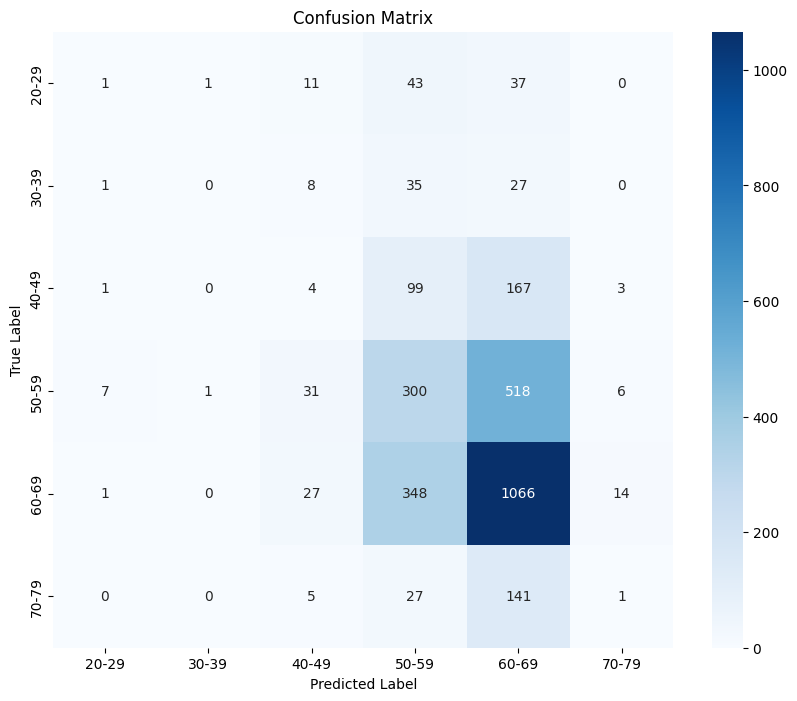

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(all_y_val, all_y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[f"{(i+2)*10}-{(i+3)*10-1}" for i in range(len(cm))],
    yticklabels=[f"{(i+2)*10}-{(i+3)*10-1}" for i in range(len(cm))],
)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [354]:
correlations = {
    embedding: avg_feature_importance[embedding_features_indicator].dot(
        gene_embedding[embedding]
    )
    for embedding in gene_embedding
}

abs_correlations = {
    embedding: avg_feature_importance[embedding_features_indicator].dot(
        np.abs(gene_embedding[embedding])
    )
    for embedding in gene_embedding
}

In [359]:
correlations_series = pd.Series(correlations)
correlations_series.sort_values(ascending=False, inplace=True)

# Convert dictionary to pandas Series and sort
abs_correlations_series = pd.Series(abs_correlations)
abs_correlations_series.sort_values(ascending=False, inplace=True)

<Axes: >

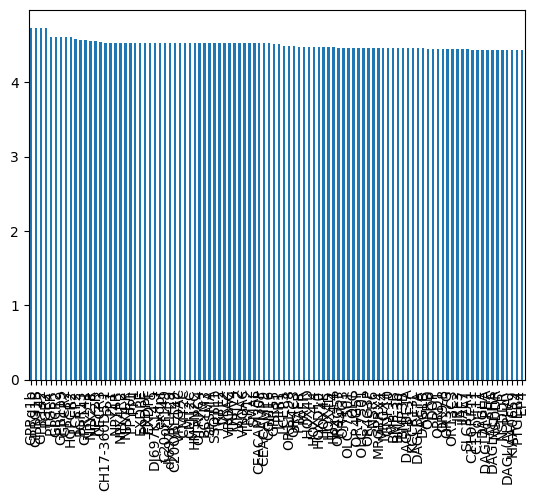

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Prepare the data
X = normalized_embeddings_df.merge(
    sample_attributes_df[["external_id", "ifn status"]],
    left_index=True,
    right_on="external_id",
)

# Filter out NA values and keep only High/Low
mask = X["ifn status"].isin(["High", "Low"])
X_filtered = X[mask]
y = X_filtered["ifn status"]
X_filtered = X_filtered.drop(["external_id", "ifn status"], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest
print("Random Forest Results:")
print("-" * 50)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# Train LightGBM
print("\nLightGBM Results:")
print("-" * 50)
lgb = LGBMClassifier(
    random_state=42, n_estimators=100, learning_rate=0.1, max_depth=-1, num_leaves=31
)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
print(classification_report(y_test, y_pred_lgb))

# Print top 10 important features for both models
print("\nTop 10 Important Features (Random Forest):")
importance_rf = pd.DataFrame(
    {"feature": X_filtered.columns, "importance": rf.feature_importances_}
)
print(importance_rf.nlargest(10, "importance"))

print("\nTop 10 Important Features (LightGBM):")
importance_lgb = pd.DataFrame(
    {"feature": X_filtered.columns, "importance": lgb.feature_importances_}
)
print(importance_lgb.nlargest(10, "importance"))

Random Forest Results:
--------------------------------------------------
              precision    recall  f1-score   support

        High       0.95      0.90      0.93        70
         Low       0.85      0.93      0.89        43

    accuracy                           0.91       113
   macro avg       0.90      0.92      0.91       113
weighted avg       0.92      0.91      0.91       113


LightGBM Results:
--------------------------------------------------
[LightGBM] [Info] Number of positive: 99, number of negative: 164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270536
[LightGBM] [Info] Number of data points in the train set: 263, number of used features: 3072
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376426 -> initscore=-0.504747
[LightGBM] [Info] Start training from score -0.504747
[LightGBM] [Warning] No further splits

In [149]:
# from src.recount3_utils import create_rse_manual
# rse = create_rse_manual("SRP150872", "data_sources/sra", "human", "gencode_v26", "gene")
# rse.head()

,gene_id,external_id,counts,rail_id,study,sample_acc,experiment_acc,submission_acc,submission_center,submission_lab,...,run_center,drug dose,drug exposure,ifn status,recruitment site,source_name,subject age,subject sex,timepoint,tissue
0,ENSG00000278704.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
1,ENSG00000277400.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
2,ENSG00000274847.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
3,ENSG00000277428.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
4,ENSG00000276256.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
